In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [8]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
X=df.iloc[:,[2,3,4]].values

In [10]:
from sklearn.cluster import KMeans

In [11]:
wcss=[]
for i in range(1,30):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

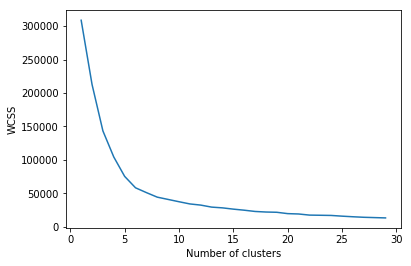

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
df=pd.read_csv("gapminder.csv")

In [14]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [15]:
df.drop(["Region"],1).head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [17]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

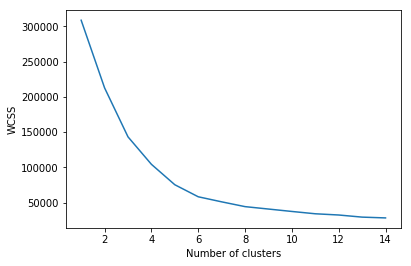

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(1,15),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
X=df.iloc[:,[0,1,2,3,4,5,6,7,8]]

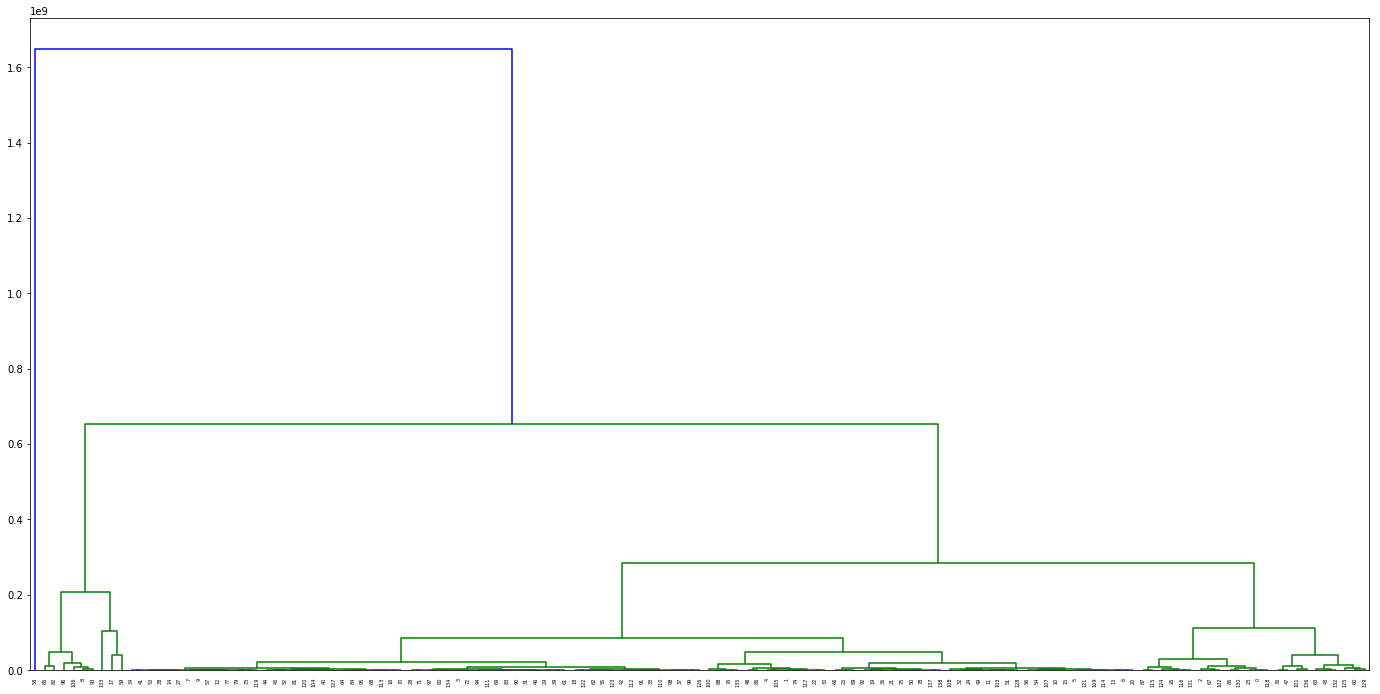

In [21]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(24,12))
#dendrogram=sch.dendrogram(sch.linkage(X,method="single"))
#dendrogram=sch.dendrogram(sch.linkage(X,method="complete"))
dendrogram=sch.dendrogram(sch.linkage(X,method="ward"))

In [22]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [23]:
#Derive insights from every clusters
pd.DataFrame(X[y_hc==1],columns=["population","fertility","HIV","CO2","BMI_male","GDP","BMI_female","life","child_mortality"]).describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.000000e+00,1.00,1.00,1.000000,1.00000,1.0,1.0000,1.0,1.0
mean,1.197070e+09,2.64,0.32,1.520849,20.95956,3901.0,123.1274,64.4,65.6
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.197070e+09,2.64,0.32,1.520849,20.95956,3901.0,123.1274,64.4,65.6
25%,1.197070e+09,2.64,0.32,1.520849,20.95956,3901.0,123.1274,64.4,65.6
50%,1.197070e+09,2.64,0.32,1.520849,20.95956,3901.0,123.1274,64.4,65.6
75%,1.197070e+09,2.64,0.32,1.520849,20.95956,3901.0,123.1274,64.4,65.6
max,1.197070e+09,2.64,0.32,1.520849,20.95956,3901.0,123.1274,64.4,65.6
